# Used Car Price Prediction

### Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
cars_df = pd.read_csv( "new_used_car_v1.csv" )

In [3]:
cars_df.sample(5)

,index,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,age,KM_Driven,make,mileage_new,engine_new,power_new
2877,5611,Maruti Wagon R LX BSII,Delhi,2006,86000,Petrol,Manual,Second,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,1.00,13,86,maruti,18.90,998.0,67.10
2705,5279,Tata Zest Revotron 1.2T XE,Kolkata,2017,65000,Petrol,Manual,First,17.57 kmpl,1193 CC,88.7 bhp,5.0,6.59 Lakh,4.80,2,65,tata,17.57,1193.0,88.70
1316,2620,Tata Indica Vista Quadrajet LS,Pune,2014,180000,Diesel,Manual,First,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,2.50,5,180,tata,22.30,1248.0,74.00
863,1721,Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV,Pune,2014,160000,Diesel,Manual,First,12.99 kmpl,2494 CC,100 bhp,8.0,NaN,12.00,5,160,toyota,12.99,2494.0,100.00
1923,3758,Hyundai i20 Magna 1.4 CRDi,Delhi,2015,44000,Diesel,Manual,First,22.54 kmpl,1396 CC,88.73 bhp,5.0,NaN,5.35,4,44,hyundai,22.54,1396.0,88.73


In [4]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3092 entries, 0 to 3091
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              3092 non-null   int64  
 1   Name               3092 non-null   object 
 2   Location           3092 non-null   object 
 3   Year               3092 non-null   int64  
 4   Kilometers_Driven  3092 non-null   int64  
 5   Fuel_Type          3092 non-null   object 
 6   Transmission       3092 non-null   object 
 7   Owner_Type         3092 non-null   object 
 8   Mileage            3092 non-null   object 
 9   Engine             3092 non-null   object 
 10  Power              3092 non-null   object 
 11  Seats              3091 non-null   float64
 12  New_Price          411 non-null    object 
 13  Price              3092 non-null   float64
 14  age                3092 non-null   int64  
 15  KM_Driven          3092 non-null   int64  
 16  make               3092 

In [5]:
pd.DataFrame(cars_df.dtypes)

,0
index,int64
Name,object
Location,object
Year,int64
Kilometers_Driven,int64
Fuel_Type,object
Transmission,object
Owner_Type,object
Mileage,object
Engine,object


### Feature Set Selection

In [6]:
features = list(cars_df.columns)

In [7]:
x_features = ['KM_Driven', 'Fuel_Type', 'age',
              'Transmission', 'Owner_Type', 'Seats', 
              'make', 'mileage_new', 'engine_new', 
              'power_new', 'Location']

In [8]:
cat_features = ['Fuel_Type', 
                'Transmission', 'Owner_Type',
                'make', 'Location']

In [9]:
num_features = list(set(x_features) - set(cat_features))

In [10]:
num_features

['KM_Driven', 'mileage_new', 'Seats', 'engine_new', 'power_new', 'age']

In [11]:
cars_df[x_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3092 entries, 0 to 3091
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   KM_Driven     3092 non-null   int64  
 1   Fuel_Type     3092 non-null   object 
 2   age           3092 non-null   int64  
 3   Transmission  3092 non-null   object 
 4   Owner_Type    3092 non-null   object 
 5   Seats         3091 non-null   float64
 6   make          3092 non-null   object 
 7   mileage_new   3092 non-null   float64
 8   engine_new    3092 non-null   float64
 9   power_new     3092 non-null   float64
 10  Location      3092 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 265.8+ KB


### Dropping Null Values

In [12]:
cars_df = cars_df[x_features + ['Price']].dropna()

In [13]:
cars_df.shape

(3091, 12)

In [14]:
cars_df.sample(5)

,KM_Driven,Fuel_Type,age,Transmission,Owner_Type,Seats,make,mileage_new,engine_new,power_new,Location,Price
1643,72,Petrol,6,Automatic,First,5.0,hyundai,15.00,1396.0,98.60,Bangalore,4.75
2083,70,Petrol,5,Manual,First,5.0,toyota,16.78,1496.0,88.73,Delhi,3.25
116,34,Diesel,3,Manual,First,5.0,maruti,28.09,1248.0,88.50,Chennai,8.45
2039,104,Petrol,18,Manual,Third,5.0,mitsubishi,13.70,1468.0,85.80,Chennai,1.00
2241,39,Petrol,6,Manual,First,5.0,honda,17.80,1198.0,86.70,Mumbai,3.89


### Setting X and y variables

In [15]:
X = cars_df[x_features]
y = cars_df['Price']

### Data Splitting

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size = 0.8,
                                                    random_state = 80)

In [18]:
X_train

,KM_Driven,Fuel_Type,age,Transmission,Owner_Type,Seats,make,mileage_new,engine_new,power_new,Location
1458,81,Diesel,5,Manual,First,5.0,volkswagen,20.14,1498.0,88.80,Hyderabad
3079,70,Petrol,9,Manual,Second,5.0,volkswagen,17.24,1198.0,73.90,Pune
2276,75,Petrol,4,Manual,First,5.0,hyundai,20.36,1197.0,78.90,Mumbai
1599,95,Petrol,21,Manual,Third,5.0,maruti,17.30,993.0,60.00,Jaipur
2356,14,Petrol,2,Manual,First,5.0,hyundai,18.60,1197.0,81.83,Kochi
...,...,...,...,...,...,...,...,...,...,...,...
522,45,Diesel,5,Manual,First,5.0,maruti,23.40,1248.0,74.00,Kolkata
2260,16,Petrol,2,Manual,First,5.0,tata,23.84,1199.0,84.00,Hyderabad
2983,21,Petrol,4,Manual,First,5.0,hyundai,18.90,1197.0,82.00,Pune
1213,83,Petrol,12,Manual,First,5.0,maruti,14.00,1061.0,64.00,Pune


In [19]:
X_train[0:10]

,KM_Driven,Fuel_Type,age,Transmission,Owner_Type,Seats,make,mileage_new,engine_new,power_new,Location
1458,81,Diesel,5,Manual,First,5.0,volkswagen,20.14,1498.0,88.80,Hyderabad
3079,70,Petrol,9,Manual,Second,5.0,volkswagen,17.24,1198.0,73.90,Pune
2276,75,Petrol,4,Manual,First,5.0,hyundai,20.36,1197.0,78.90,Mumbai
1599,95,Petrol,21,Manual,Third,5.0,maruti,17.30,993.0,60.00,Jaipur
2356,14,Petrol,2,Manual,First,5.0,hyundai,18.60,1197.0,81.83,Kochi
737,12,Petrol,3,Manual,First,5.0,maruti,21.40,1197.0,83.10,Mumbai
265,50,Diesel,4,Manual,First,5.0,volkswagen,20.14,1498.0,88.80,Hyderabad
713,59,Petrol,12,Manual,First,4.0,maruti,16.10,796.0,37.00,Jaipur
82,88,Diesel,7,Manual,First,5.0,chevrolet,25.44,936.0,57.60,Jaipur
2918,27,Petrol,2,Manual,First,5.0,maruti,22.74,796.0,47.30,Kochi


In [20]:
X_test.shape

(619, 11)

### Encode Categorical Variables

In [21]:
from sklearn.preprocessing import OneHotEncoder

In [22]:
ohe_encoder = OneHotEncoder(handle_unknown='ignore')

In [23]:
ohe_encoder.fit(X_train[cat_features])

OneHotEncoder(handle_unknown='ignore')

In [24]:
ohe_encoder.categories_

[array(['Diesel', 'Petrol'], dtype=object),
 array(['Automatic', 'Manual'], dtype=object),
 array(['First', 'Fourth & Above', 'Second', 'Third'], dtype=object),
 array(['chevrolet', 'datsun', 'fiat', 'ford', 'honda', 'hyundai',
        'mahindra', 'maruti', 'mitsubishi', 'nissan', 'renault', 'skoda',
        'tata', 'toyota', 'volkswagen'], dtype=object),
 array(['Ahmedabad', 'Bangalore', 'Chennai', 'Coimbatore', 'Delhi',
        'Hyderabad', 'Jaipur', 'Kochi', 'Kolkata', 'Mumbai', 'Pune'],
       dtype=object)]

In [25]:
encoded_cat_names = list(ohe_encoder.get_feature_names(cat_features))
encoded_cat_names

['Fuel_Type_Diesel',
 'Fuel_Type_Petrol',
 'Transmission_Automatic',
 'Transmission_Manual',
 'Owner_Type_First',
 'Owner_Type_Fourth & Above',
 'Owner_Type_Second',
 'Owner_Type_Third',
 'make_chevrolet',
 'make_datsun',
 'make_fiat',
 'make_ford',
 'make_honda',
 'make_hyundai',
 'make_mahindra',
 'make_maruti',
 'make_mitsubishi',
 'make_nissan',
 'make_renault',
 'make_skoda',
 'make_tata',
 'make_toyota',
 'make_volkswagen',
 'Location_Ahmedabad',
 'Location_Bangalore',
 'Location_Chennai',
 'Location_Coimbatore',
 'Location_Delhi',
 'Location_Hyderabad',
 'Location_Jaipur',
 'Location_Kochi',
 'Location_Kolkata',
 'Location_Mumbai',
 'Location_Pune']

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [27]:
preprocessor = ColumnTransformer(
    transformers=[        
        ('cat', ohe_encoder, cat_features)],
remainder='passthrough')

### Linear Models

Assumes linear relationship between features and outcome variable.

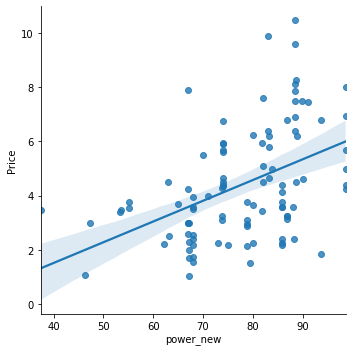

In [28]:
sn.lmplot( data = cars_df.sample(100),
           x = 'power_new',
           y = 'Price');

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lreg_v1 = Pipeline(steps=[('preprocessor', preprocessor),
                          ('regressor', LinearRegression())])

In [31]:
lreg_v1.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Fuel_Type', 'Transmission',
                                                   'Owner_Type', 'make',
                                                   'Location'])])),
                ('regressor', LinearRegression())])

In [32]:
final_feature_names = lreg_v1['preprocessor'].get_feature_names()

### Understanding model parameters

In [33]:
lreg_v1['regressor'].intercept_

1.1404277441625483

In [34]:
lreg_v1['regressor'].coef_

array([ 4.98593908e-01, -4.98593908e-01,  1.24732993e-01, -1.24732993e-01,
        1.49633532e-01, -4.91531040e-01, -6.38249560e-03,  3.48280004e-01,
       -6.82501340e-01, -8.75909328e-01, -6.40219781e-01, -2.19732381e-02,
       -5.57235418e-03,  2.08056099e-01, -6.70106786e-01,  7.21213921e-01,
        1.34125054e+00, -5.33596387e-02,  1.53219735e-01,  7.33895966e-02,
       -8.21919517e-01,  1.09781614e+00,  1.76615956e-01, -6.58471014e-02,
        4.18484536e-01,  9.05263039e-02,  8.41248951e-01, -4.90470673e-01,
        4.45499745e-01, -8.96728385e-02,  2.67100476e-01, -1.07658952e+00,
       -2.44113005e-01, -9.61668695e-02, -1.07849301e-02, -3.38038628e-01,
        1.78601824e-01, -2.58326504e-02,  1.10294977e-03,  4.87303511e-02])

In [35]:
dict(zip(final_feature_names, np.round(lreg_v1['regressor'].coef_, 2)))

{'cat__x0_Diesel': 0.5,
 'cat__x0_Petrol': -0.5,
 'cat__x1_Automatic': 0.12,
 'cat__x1_Manual': -0.12,
 'cat__x2_First': 0.15,
 'cat__x2_Fourth & Above': -0.49,
 'cat__x2_Second': -0.01,
 'cat__x2_Third': 0.35,
 'cat__x3_chevrolet': -0.68,
 'cat__x3_datsun': -0.88,
 'cat__x3_fiat': -0.64,
 'cat__x3_ford': -0.02,
 'cat__x3_honda': -0.01,
 'cat__x3_hyundai': 0.21,
 'cat__x3_mahindra': -0.67,
 'cat__x3_maruti': 0.72,
 'cat__x3_mitsubishi': 1.34,
 'cat__x3_nissan': -0.05,
 'cat__x3_renault': 0.15,
 'cat__x3_skoda': 0.07,
 'cat__x3_tata': -0.82,
 'cat__x3_toyota': 1.1,
 'cat__x3_volkswagen': 0.18,
 'cat__x4_Ahmedabad': -0.07,
 'cat__x4_Bangalore': 0.42,
 'cat__x4_Chennai': 0.09,
 'cat__x4_Coimbatore': 0.84,
 'cat__x4_Delhi': -0.49,
 'cat__x4_Hyderabad': 0.45,
 'cat__x4_Jaipur': -0.09,
 'cat__x4_Kochi': 0.27,
 'cat__x4_Kolkata': -1.08,
 'cat__x4_Mumbai': -0.24,
 'cat__x4_Pune': -0.1,
 'KM_Driven': -0.01,
 'age': -0.34,
 'Seats': 0.18,
 'mileage_new': -0.03,
 'engine_new': 0.0,
 'power_new': 

### Predict on test set

In [36]:
y_pred = lreg_v1.predict(X_test)

In [37]:
y_df = pd.DataFrame({"actual": y_test,
                     "predicted": y_pred,
                     "residual": y_pred - y_test})

In [38]:
y_df.sample(10, random_state = 100)

,actual,predicted,residual
770,7.23,6.140305,-1.089695
1540,6.43,5.414607,-1.015393
2962,6.25,5.942548,-0.307452
2040,4.69,5.412554,0.722554
640,2.65,2.718154,0.068154
81,8.35,6.461810,-1.888190
2773,6.75,5.823465,-0.926535
816,3.00,4.078730,1.078730
305,1.96,1.310204,-0.649796
2907,4.00,4.426238,0.426238


### Measuring Accuracy

In [39]:
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
mse_v1 = mean_squared_error(y_test, y_pred)

In [41]:
mse_v1

0.9756399731866288

In [42]:
rmse_v1 = np.sqrt(mse_v1)

In [43]:
rmse_v1

0.9877448927666641

In [44]:
r2_score(y_test, y_pred)

0.7855650379068236

### What are the reasons for the remaining error

1. More factors 
2. More samples 
3. Complex Models : Try other models
4. Feature Engineering - Derive new features (factors) from existing features (factors)
5. Noise (randomness)
   

### Error Analysis

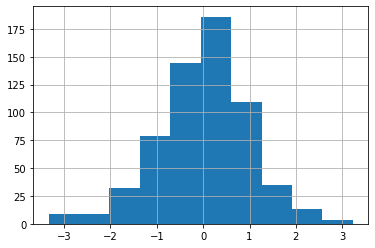

In [45]:
y_df.residual.hist();

In [46]:
y_df

,actual,predicted,residual
1324,5.91,5.822324,-0.087676
328,3.95,5.778981,1.828981
1361,10.34,8.235078,-2.104922
1657,1.20,1.679801,0.479801
1786,1.55,1.881649,0.331649
...,...,...,...
112,2.65,1.986047,-0.663953
2893,5.65,5.972145,0.322145
2093,2.25,2.659763,0.409763
2038,6.10,7.260006,1.160006


In [63]:
test_cars_df = y_df.join(X_test)

In [64]:
test_cars_df.sample(5)

,actual,predicted,residual,KM_Driven,Fuel_Type,age,Transmission,Owner_Type,Seats,make,mileage_new,engine_new,power_new,Location
1319,4.96,4.994573,0.034573,66,Diesel,4,Manual,First,5.0,hyundai,24.00,1120.0,70.00,Kochi
2685,4.55,4.505455,-0.044545,41,Petrol,5,Manual,First,5.0,hyundai,17.00,1197.0,80.00,Chennai
2521,6.30,6.453249,0.153249,67,Diesel,3,Manual,First,7.0,mahindra,18.49,1493.0,100.00,Pune
588,8.00,8.101293,0.101293,119,Diesel,6,Manual,First,8.0,toyota,12.99,2494.0,100.00,Ahmedabad
3055,5.90,6.789444,0.889444,27,Diesel,1,Manual,First,5.0,maruti,28.40,1248.0,73.75,Pune


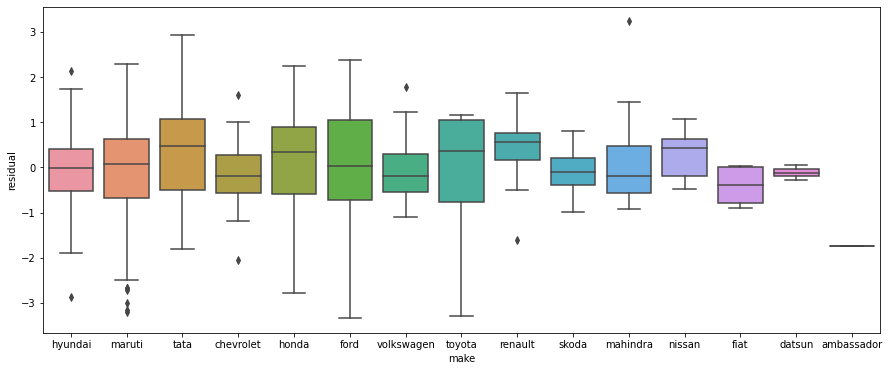

In [48]:
plt.figure(figsize=(15, 6))
sn.boxplot(data = test_cars_df, x = 'make', y = 'residual');

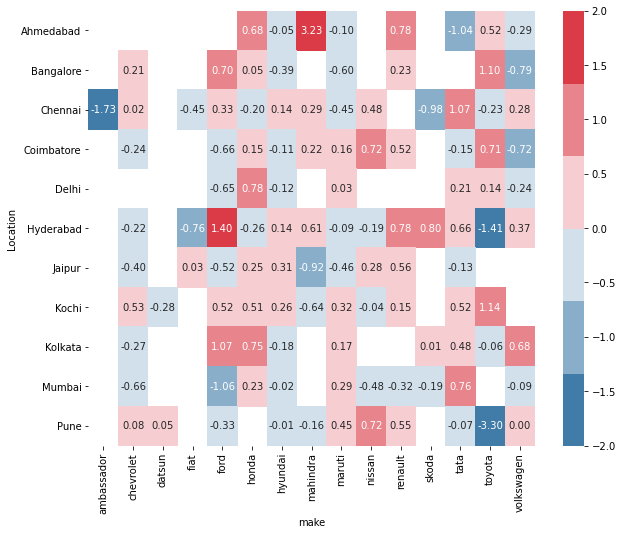

In [66]:
make_mean = pd.crosstab(test_cars_df.Location,
                        test_cars_df.make,
                        values = test_cars_df.residual,
                        aggfunc = 'median')

plt.figure(figsize=(10, 8))
sn.heatmap(make_mean, 
           annot=True, 
           cmap=sn.diverging_palette(240, 10),
           vmax = 2.0,
           vmin = -2.0,
           fmt='1.2f');

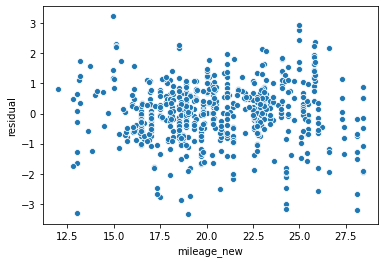

In [67]:
sn.scatterplot(data = test_cars_df,
               x = 'power_m',
               y = 'residual')

### Saving the model

In [52]:
class CarPredictionModel():
    
    def __init__(self, model, features, rmse):
        self.model = model
        self.features = features
        self.rmse = rmse

In [53]:
my_model = CarPredictionModel(lreg_v1, list(X_train.columns), rmse_v1)

In [54]:
# Uncomment this code for older version of sklearn
#from sklearn.externals import joblib
#joblib.dump(my_model, './cars.pkl')

In [55]:
from joblib import dump

In [56]:
dump(my_model, './cars.pkl')

['./cars.pkl']